In [142]:
import pandas as pd
import matplotlib.pyplot as plt

In [143]:
merged_data = pd.read_csv('merged_data.csv')

C:\Users\Taric\AppData\Local\Temp\ipykernel_12508\327385356.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_data = pd.read_csv('merged_data.csv')


In [181]:
business_status = merged_data[['Unnamed: 0', 'OWNCHAR_LABEL']]
business_status = business_status[(business_status['OWNCHAR_LABEL'] == 'Business is still operating and the owner still owns it') | (business_status['OWNCHAR_LABEL'] == 'Business is no longer in operation') | (business_status['OWNCHAR_LABEL'] == 'Business was purchased by another company') | (business_status['OWNCHAR_LABEL'] == 'Business was purchased by another individual')]
business_status = business_status.groupby('OWNCHAR_LABEL').count()
business_status = business_status.sort_values(by = ['Unnamed: 0'], ascending=True)
business_status.head()

,Unnamed: 0
OWNCHAR_LABEL,
Business was purchased by another company,9558
Business was purchased by another individual,10266
Business is no longer in operation,11442
Business is still operating and the owner still owns it,12039


Text(0.5, 1.0, 'Number of Businesses by Status')

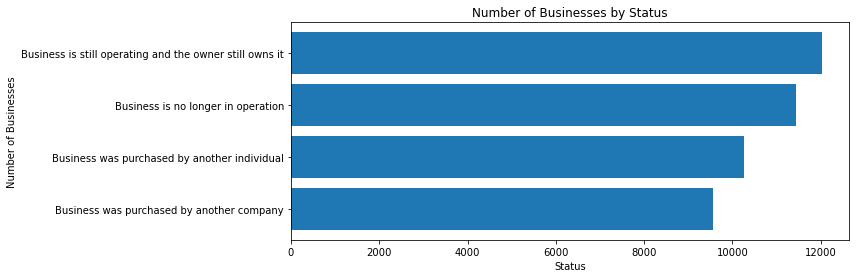

In [182]:
plt.figure(figsize=(10,4))
plt.barh(business_status.index, business_status['Unnamed: 0'])

ax = plt.gca()
ax.set_ylabel('Number of Businesses')
ax.set_xlabel('Status')
ax.set_title('Number of Businesses by Status')


In [146]:
successful_business = merged_data[(merged_data['OWNCHAR_LABEL'] == 'Business is still operating and the owner still owns it')]

In [147]:
success_owner_race = successful_business[['OWNER_RACE_LABEL', 'Unnamed: 0']].groupby('OWNER_RACE_LABEL').count()
success_owner_race.drop('All owners of respondent firms', inplace=True)
success_owner_race.drop('Minority', inplace=True)
success_owner_race.drop('Nonminority', inplace=True)
success_owner_race = success_owner_race.sort_values(by = ['Unnamed: 0'], ascending=False)
success_owner_race

,Unnamed: 0
OWNER_RACE_LABEL,
White,987
Asian,906
Black or African American,837
American Indian and Alaska Native,771
Native Hawaiian and Other Pacific Islander,607


Text(0.5, 1.0, 'Number of Successful Business Owners by Race')

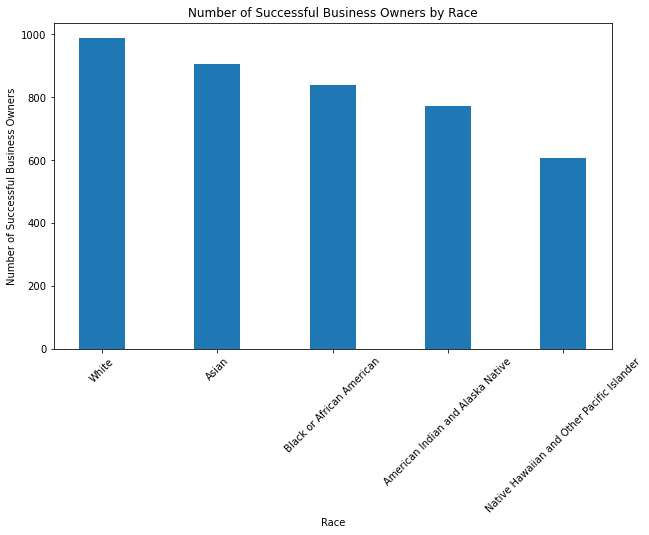

In [163]:
plt.figure(figsize=(10,6))
plt.bar(success_owner_race.index, success_owner_race['Unnamed: 0'], width = 0.4)
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
ax = plt.gca()
ax.set_ylabel('Number of Successful Business Owners')
ax.set_xlabel('Race')
ax.set_title('Number of Successful Business Owners by Race')

In [149]:
success_owner_sex = successful_business[['OWNER_SEX_LABEL', 'Unnamed: 0']].groupby('OWNER_SEX_LABEL').count()
success_owner_sex.drop('All owners of respondent firms', inplace=True)
success_owner_sex.head()

,Unnamed: 0
OWNER_SEX_LABEL,
Female,2775
Male,2858


Text(0.5, 1.0, 'Number of Successful Business Owners by Sex')

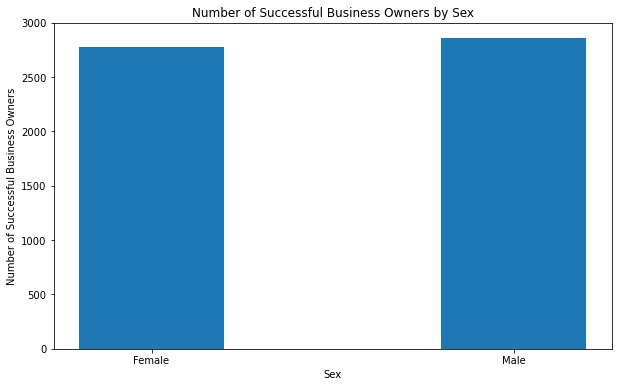

In [168]:
plt.figure(figsize=(10,6))
plt.bar(success_owner_sex.index, success_owner_sex['Unnamed: 0'], width = 0.4)
x = plt.gca().xaxis
ax = plt.gca()
ax.set_ylabel('Number of Successful Business Owners')
ax.set_xlabel('Sex')
ax.set_title('Number of Successful Business Owners by Sex')

In [151]:
successful_business_sector = successful_business[['NAICS2017_LABEL', 'Unnamed: 0']].groupby('NAICS2017_LABEL').count()
successful_business_sector.drop('Total for all sectors', inplace=True)
successful_business_sector.drop('Industries not classified', inplace=True)
successful_business_sector = successful_business_sector.sort_values(by = ['Unnamed: 0'], ascending=True)
successful_business_sector


,Unnamed: 0
NAICS2017_LABEL,
Utilities,451
"Agriculture, forestry, fishing and hunting",452
"Mining, quarrying, and oil and gas extraction",471
"Arts, entertainment, and recreation",511
Management of companies and enterprises,516
Educational services,542
Finance and insurance,565
Other services (except public administration),567
Real estate and rental and leasing,568


In [152]:
successful_business_sector.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, Utilities to Manufacturing
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  19 non-null     int64
dtypes: int64(1)
memory usage: 304.0+ bytes


Text(0.5, 1.0, 'Number of Successful Businesses by Sector')

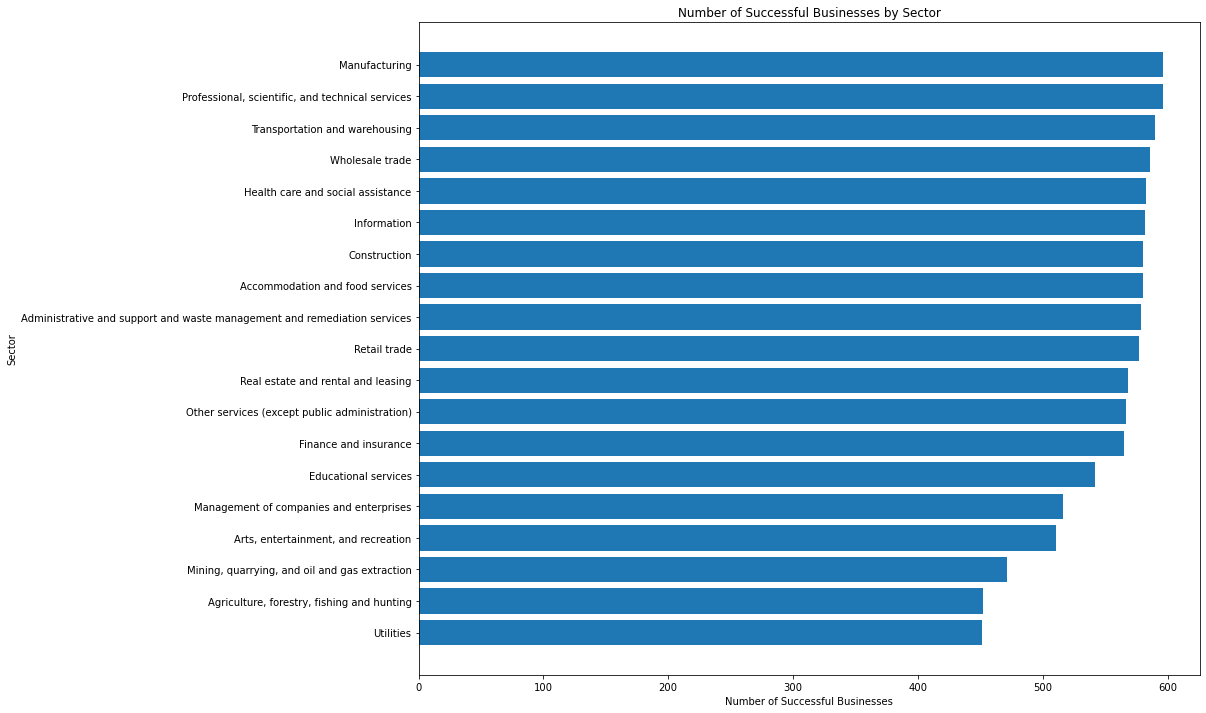

In [153]:
plt.figure(figsize=(14,12))
plt.barh(successful_business_sector.index, successful_business_sector['Unnamed: 0'])
x = plt.gca().xaxis

ax = plt.gca()
#ax.set_xlabel('Date')
ax.set_ylabel('Sector')
ax.set_xlabel('Number of Successful Businesses')
ax.set_title('Number of Successful Businesses by Sector')

In [177]:
successful_business_workers= successful_business[['BUSCHAR_LABEL', 'Unnamed: 0']]
successful_business_workers = successful_business_workers[(successful_business_workers['BUSCHAR_LABEL'] == 'Paid day laborers') | (successful_business_workers['BUSCHAR_LABEL'] == 'Full-time paid employees') | (successful_business_workers['BUSCHAR_LABEL'] == 'Part-time paid employees	') | (successful_business_workers['BUSCHAR_LABEL'] == 'Leased employees from leasing service or professional employer organization') | (successful_business_workers['BUSCHAR_LABEL'] == 'Contractors, subcontractors, independent contractors, or outside consultants') | (successful_business_workers['BUSCHAR_LABEL'] == 'Temporary staffing obtained from a temporary help service') | (successful_business_workers['BUSCHAR_LABEL'] == 'Part-time paid employees')]
successful_business_workers = successful_business_workers.groupby('BUSCHAR_LABEL').count()
successful_business_workers = successful_business_workers.sort_values(by = ['Unnamed: 0'], ascending=True)
successful_business_workers

,Unnamed: 0
BUSCHAR_LABEL,
Leased employees from leasing service or professional employer organization,218
Temporary staffing obtained from a temporary help service,252
Paid day laborers,254
"Contractors, subcontractors, independent contractors, or outside consultants",294
Full-time paid employees,295
Part-time paid employees,297


Text(0.5, 1.0, 'Successful Businesses by Worker Type(s)')

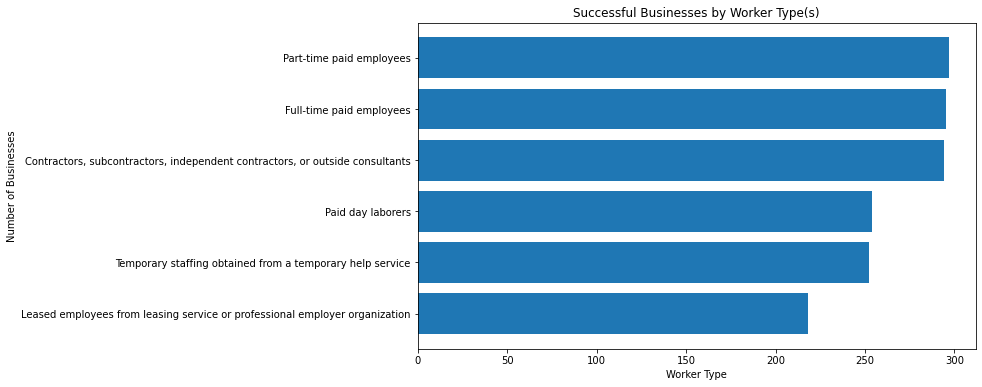

In [178]:
plt.figure(figsize=(10,6))
plt.barh(successful_business_workers.index, successful_business_workers['Unnamed: 0'])
x = plt.gca().xaxis

ax = plt.gca()
ax.set_ylabel('Number of Businesses')
ax.set_xlabel('Worker Type')
ax.set_title('Successful Businesses by Worker Type(s)')

In [184]:
employee_types = successful_business[['EMP', 'BUSCHAR_LABEL']]
employee_types = employee_types[(employee_types['BUSCHAR_LABEL'] == 'Paid day laborers') | (employee_types['BUSCHAR_LABEL'] == 'Full-time paid employees') | (employee_types['BUSCHAR_LABEL'] == 'Part-time paid employees	') | (employee_types['BUSCHAR_LABEL'] == 'Leased employees from leasing service or professional employer organization') | (employee_types['BUSCHAR_LABEL'] == 'Contractors, subcontractors, independent contractors, or outside consultants') | (employee_types['BUSCHAR_LABEL'] == 'Temporary staffing obtained from a temporary help service') | (employee_types['BUSCHAR_LABEL'] == 'Part-time paid employees')]
employee_types = employee_types.groupby('BUSCHAR_LABEL').sum()
employee_types = employee_types.sort_values(by = ['EMP'], ascending=True)
employee_types.head(6)

,EMP
BUSCHAR_LABEL,
Paid day laborers,8443242
Leased employees from leasing service or professional employer organization,18322565
Temporary staffing obtained from a temporary help service,65957051
"Contractors, subcontractors, independent contractors, or outside consultants",125429279
Part-time paid employees,197048888
Full-time paid employees,235150361


Text(0.5, 1.0, 'Number of Workers by Worker Type (Hundreds of Millions)')

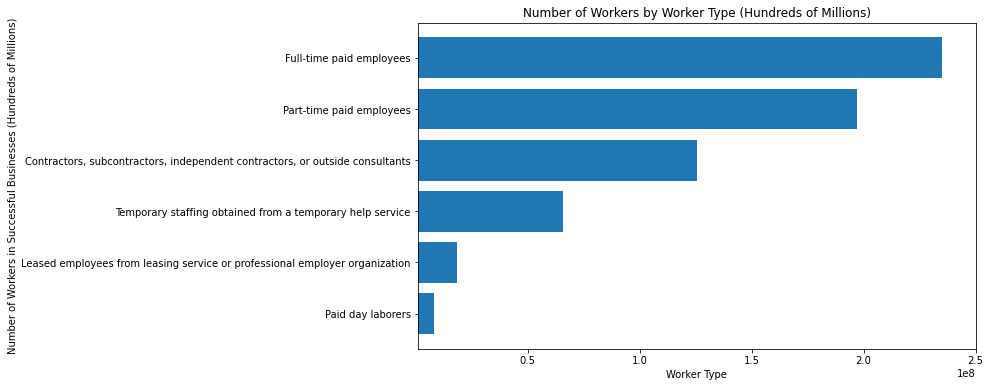

In [186]:
plt.figure(figsize=(10,6))
plt.barh(employee_types.index, employee_types['EMP'])

ax = plt.gca()
ax.set_ylabel('Number of Workers in Successful Businesses (Hundreds of Millions)')
ax.set_xlim(1000000,250000000)
ax.set_xlabel('Worker Type')
ax.set_title('Number of Workers by Worker Type (Hundreds of Millions)')